In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# get the data

In [79]:
diamond=pd.read_csv('diamonds.csv')

# take a look at the data 

In [80]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [81]:
diamond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [82]:
diamond.shape

(53940, 11)

In [83]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# we want to drop the unnammed column , it's not necessary 

In [84]:
diamond.drop(columns=['Unnamed: 0'],inplace=True)

In [85]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [86]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [87]:
diamond.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [88]:
diamond.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [89]:
diamond.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [90]:
diamond.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [91]:
print("Cut: ",set(diamond["cut"]))
print("Color: ",set(diamond["color"]))
print("Clarity: ",set(diamond["clarity"]))

Cut:  {'Fair', 'Very Good', 'Premium', 'Ideal', 'Good'}
Color:  {'G', 'I', 'D', 'J', 'E', 'F', 'H'}
Clarity:  {'SI2', 'I1', 'IF', 'SI1', 'VS1', 'VS2', 'VVS1', 'VVS2'}


In [92]:
diamonds_corr=diamond.corr()
diamonds_corr['price'].sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

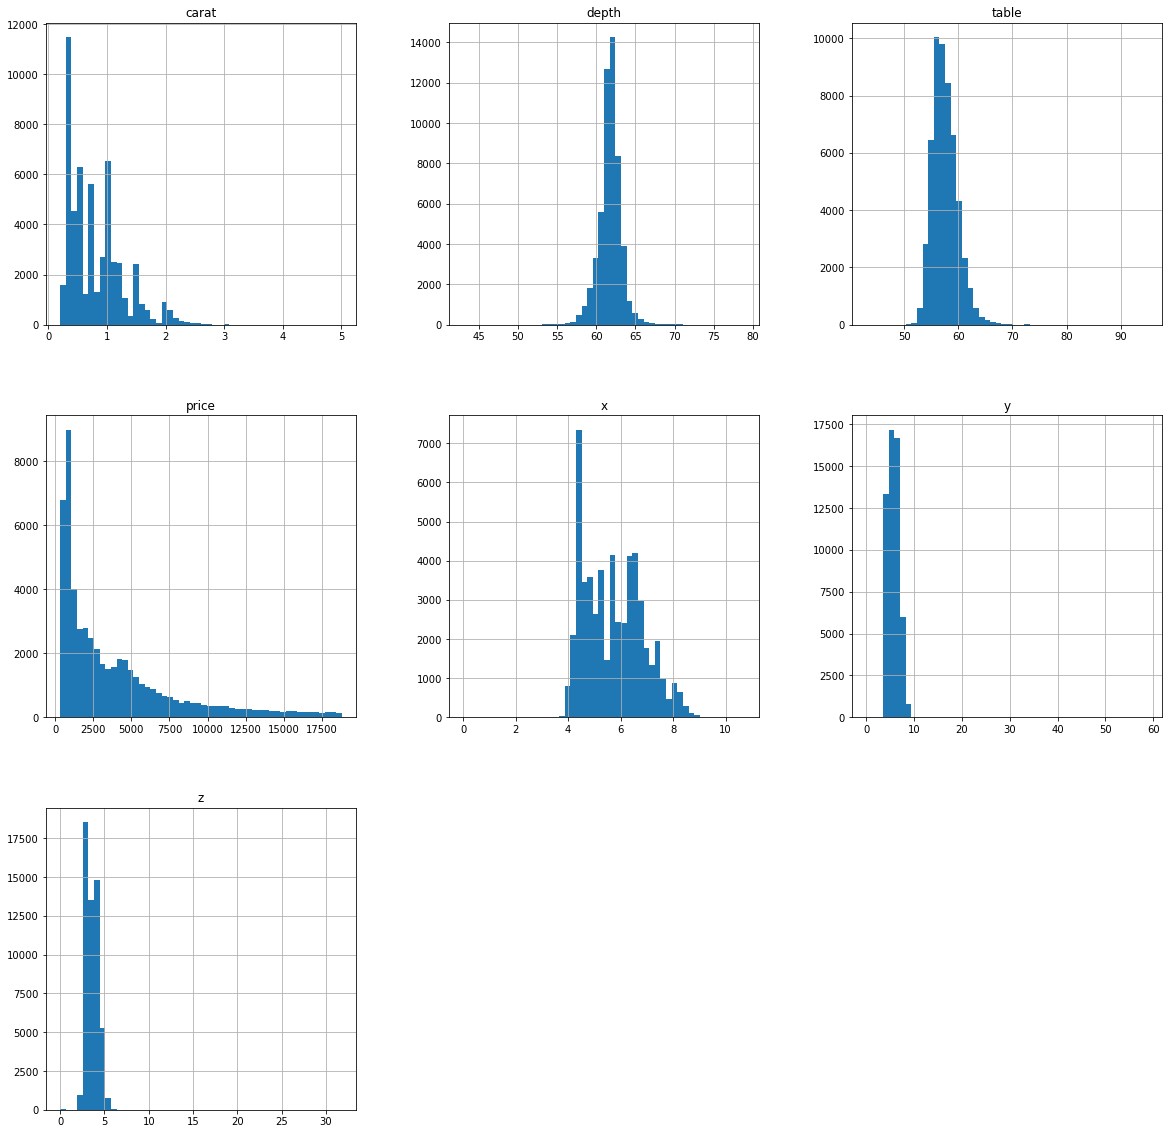

In [93]:
diamond.hist(bins=50,figsize=(20,20))
plt.show()

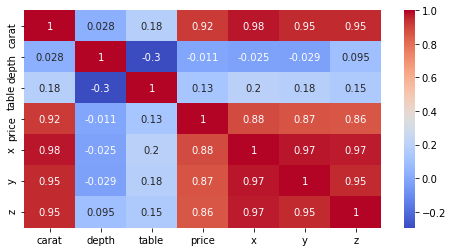

In [94]:
plt.figure(figsize=(8,4))
sns.heatmap(diamond.corr(),annot=True,cmap='coolwarm')
plt.show()

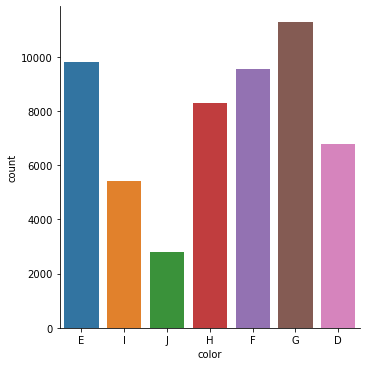

<AxesSubplot:xlabel='price', ylabel='color'>

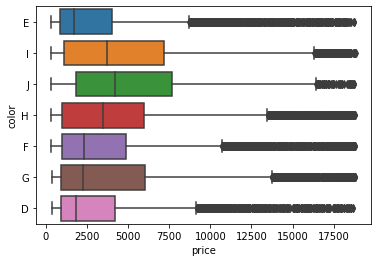

In [95]:
sns.catplot(x='color', data=diamond, kind='count')
plt.show()
sns.boxplot(data=diamond,x=diamond['price'], y=diamond['color'])

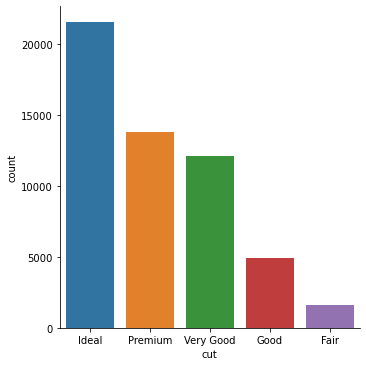

<AxesSubplot:xlabel='price', ylabel='cut'>

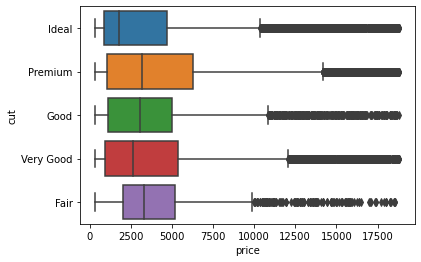

In [96]:
sns.catplot(x='cut', data=diamond, order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], kind='count')
plt.show()
sns.boxplot(data=diamond,x=diamond['price'], y=diamond['cut'])

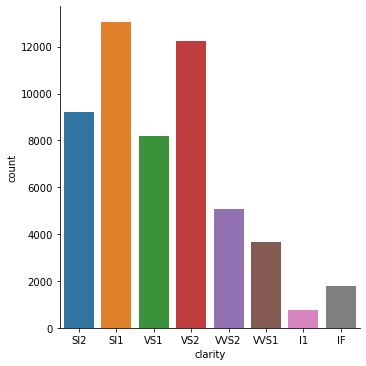

<AxesSubplot:xlabel='price', ylabel='clarity'>

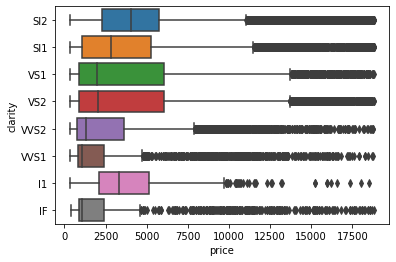

In [97]:
sns.catplot(x='clarity', data=diamond, kind='count')
plt.show()
sns.boxplot(data=diamond,x=diamond['price'], y=diamond['clarity'])

# now we want to prepare the data for ML

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
encoder=LabelEncoder()

In [100]:
diamond['cut']= encoder.fit_transform(diamond['cut'])
diamond_cut_encoded={index: label for index, label in enumerate(encoder.classes_)} 
diamond_cut_encoded

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}

In [101]:
diamond['color']= encoder.fit_transform(diamond['color'])
diamond_color_encoded={index: label for index, label in enumerate(encoder.classes_)} 
diamond_color_encoded

{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}

In [102]:
diamond['clarity']= encoder.fit_transform(diamond['clarity'])
diamond_clarity_encoded={index: label for index, label in enumerate(encoder.classes_)} 
diamond_clarity_encoded

{0: 'I1',
 1: 'IF',
 2: 'SI1',
 3: 'SI2',
 4: 'VS1',
 5: 'VS2',
 6: 'VVS1',
 7: 'VVS2'}

In [103]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [104]:
diamond.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,0,3,62.2,55.0,2757,5.83,5.87,3.64


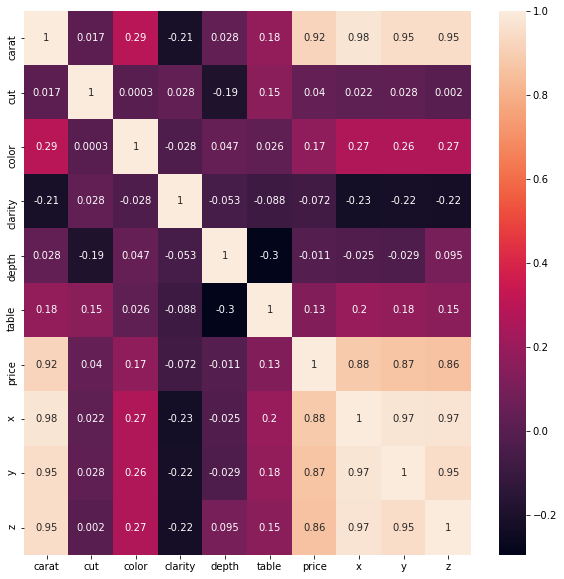

In [105]:
plt.figure(figsize=(10, 10))
sns.heatmap(diamond.corr(), annot=True)
plt.show()

<AxesSubplot:>

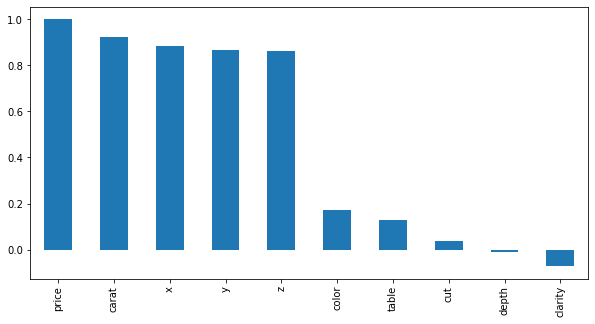

In [106]:
correlation=diamond.corr()
plt.figure(figsize=(10,5))
correlation['price'].sort_values(ascending= False).plot(kind='bar')

x,y,z has good correlation with the price 

In [107]:
diamond['volume'] = diamond['x'] * diamond['y'] * diamond['z']
diamond = diamond.drop(['x', 'y', 'z'], axis=1)


<AxesSubplot:>

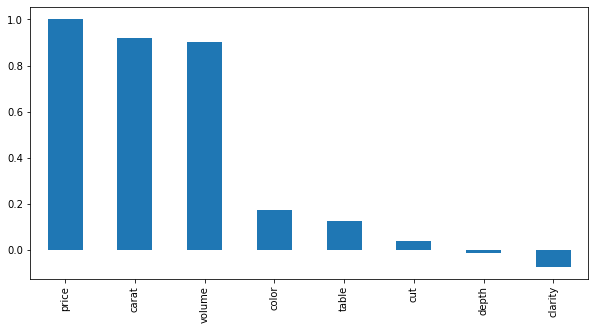

In [108]:
correlation=diamond.corr()
plt.figure(figsize=(10,5))
correlation['price'].sort_values(ascending= False).plot(kind='bar')

it makes sense now 

In [111]:
print('correlation after')
correlation["price"].sort_values(ascending= False)

correlation after


price      1.000000
carat      0.921591
volume     0.902385
color      0.172511
table      0.127134
cut        0.039860
depth     -0.010647
clarity   -0.071535
Name: price, dtype: float64

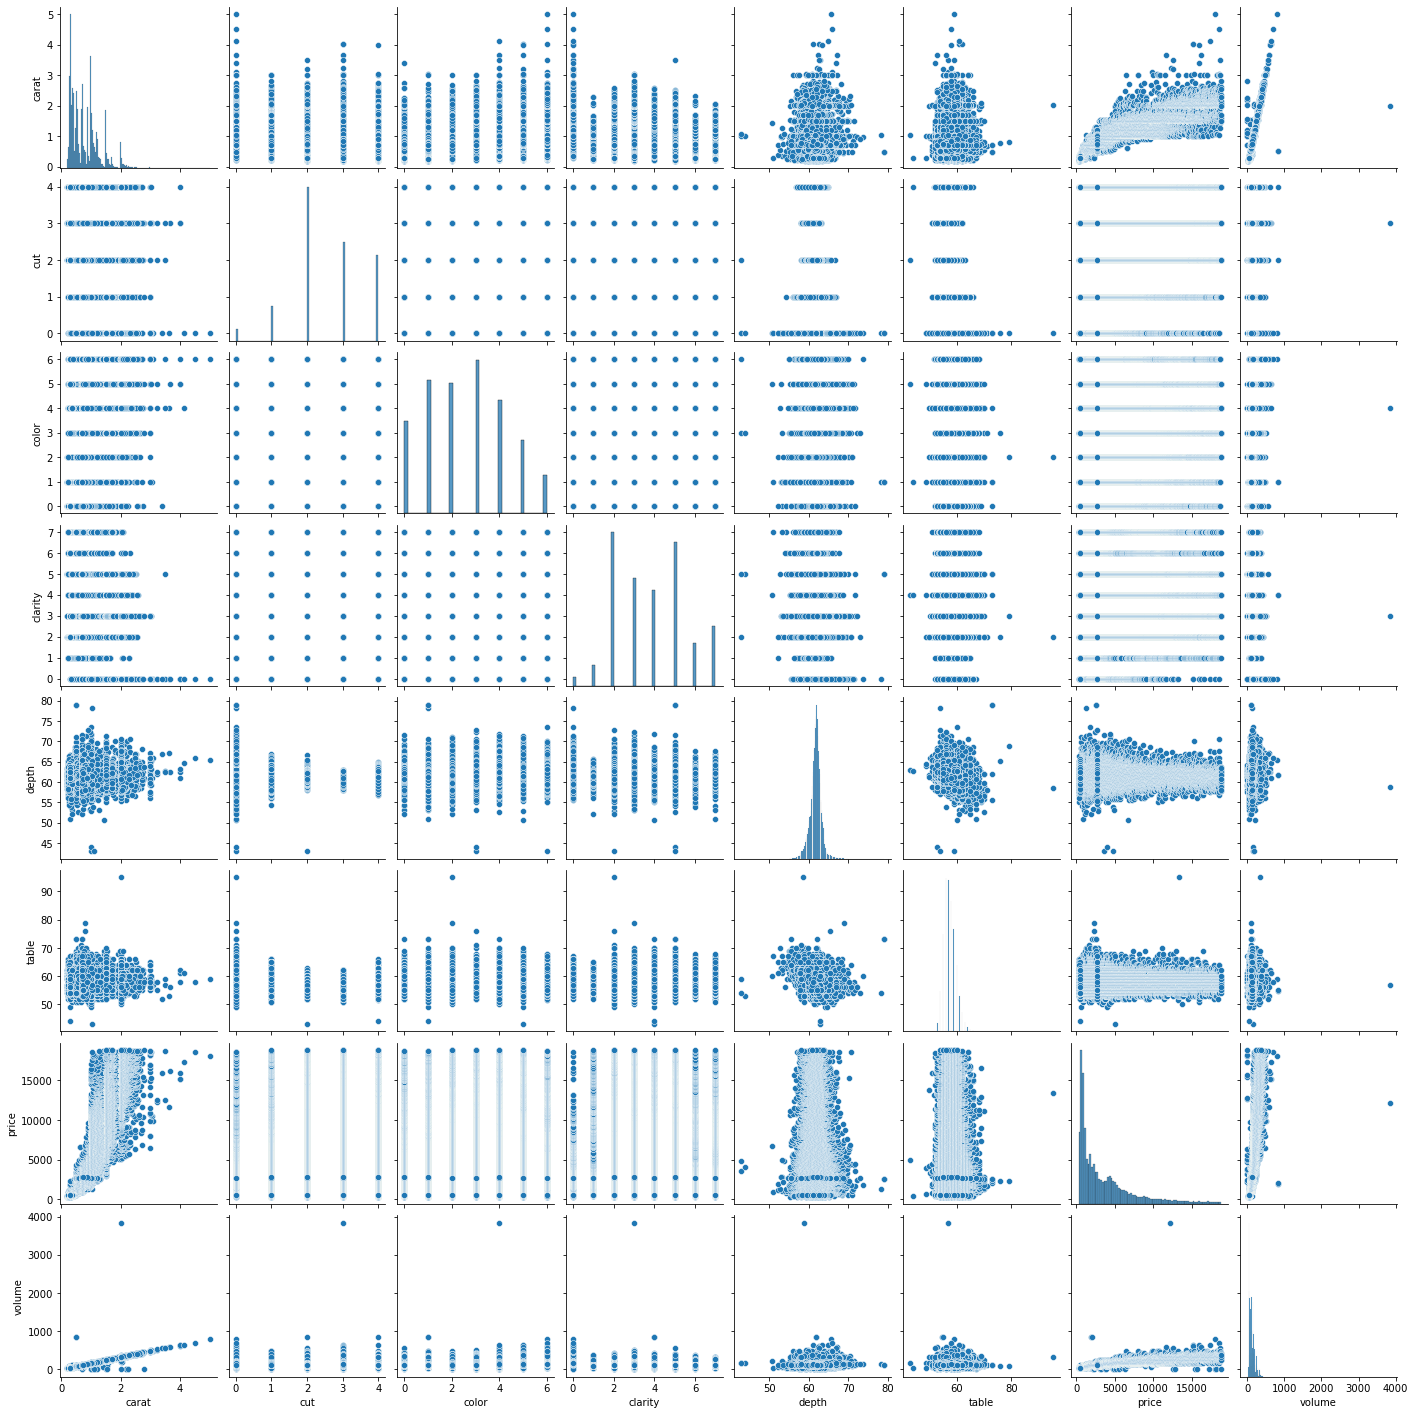

In [110]:
sns.pairplot(diamond)

<AxesSubplot:xlabel='carat', ylabel='price'>

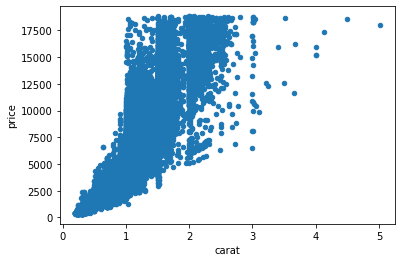

In [112]:
diamond.plot(kind="scatter",x='carat', y='price')

we found that the price goes up when the carat goes up 

In [114]:
print('correlations after')
corr_matrix = diamond.corr()
print(corr_matrix['price'].sort_values(ascending=False))


correlations after
price       1.000000
carat       0.921591
xyz         0.902385
color2      0.172511
table       0.127134
cut1        0.049421
depth      -0.010647
clarity1   -0.071535
Name: price, dtype: float64


In [115]:
diamond.head()

,carat,depth,table,price,cut1,color2,clarity1,xyz
0,0.23,61.5,55.0,326,0,1,3,38.202030
1,0.21,59.8,61.0,326,1,1,2,34.505856
2,0.23,56.9,65.0,327,2,1,4,38.076885
3,0.29,62.4,58.0,334,1,5,5,46.724580
4,0.31,63.3,58.0,335,2,6,3,51.917250


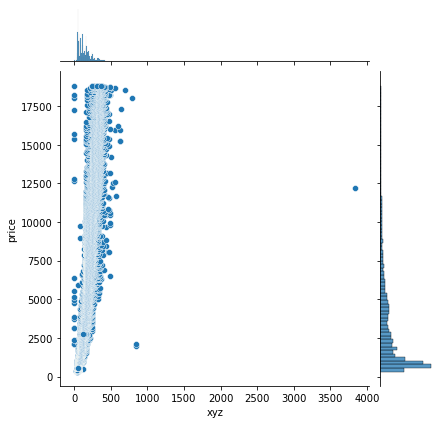

In [117]:
sns.jointplot(x='xyz',y='price',data=diamond,kind='scatter')

# Train and Split the data

In [116]:
y=diamond[['price']]
x=diamond.drop(['price'],axis=1)

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Now we want to select and traina model

We will use  four regression techniques :



In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Linear regression 
#Ridge regression 
#Lasso regression 
#Random forest)

# Linear Regression

In [122]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

print("Accuracy = " + str(reg.score(x_train,y_train)*100)+"%")
print("MAE =" + str(format(mean_absolute_error(y_test,y_pred))))
print("MSE =" + str(format(mean_squared_error(y_test,y_pred))))

Accuracy = 88.00470145500289%
MAE =925.8825754496419
MSE =1854710.2387339633


# Ridge regression 

In [124]:
rr=linear_model.Ridge()
rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)

print("Accuracy = " + str(rr.score(x_train,y_train)*100)+"%")
print("MAE =" + str(format(mean_absolute_error(y_test,y_pred))))
print("MSE =" + str(format(mean_squared_error(y_test,y_pred))))

Accuracy = 88.0046792499494%
MAE =925.7948956914594
MSE =1854612.4689562412


# Random forest

In [127]:
rand_r=RandomForestRegressor()
rand_r.fit(x_train,y_train)
y_pred=rand_r.predict(x_test)

print("Accuracy = " + str(rand_r.score(x_train,y_train)*100)+"%")
print("MAE =" + str(format(mean_absolute_error(y_test,y_pred))))
print("MSE =" + str(format(mean_squared_error(y_test,y_pred))))

<ipython-input-127-11174bc0db53>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_r.fit(x_train,y_train)


Accuracy = 99.72604049721299%
MAE =280.54763266330343
MSE =298808.40630015905


# Lasso regression

In [128]:
las=linear_model.Lasso()
las.fit(x_train,y_train)
y_pred=las.predict(x_test)

print("Accuracy = " + str(las.score(x_train,y_train)*100)+"%")
print("MAE =" + str(format(mean_absolute_error(y_test,y_pred))))
print("MSE =" + str(format(mean_squared_error(y_test,y_pred))))

Accuracy = 88.00416603906352%
MAE =925.2998517562121
MSE =1854264.1641553184


# Random Forest gives the best result 99.726% so it's the best model 